#  Libraries 

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

#Model
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score


#Metrics
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv(r'E:\DS\ML\project\ML_project6_StockMarket\data.txt')

In [3]:
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1970-01-02,2.2972,2.3178,2.2972,2.2972,26437,0
1,1970-01-05,2.2972,2.2972,2.2544,2.2759,29887,0
2,1970-01-06,2.2759,2.2759,2.2342,2.2342,106900,0
3,1970-01-07,2.2342,2.2342,2.2342,2.2342,85061,0
4,1970-01-08,2.2342,2.2342,2.2139,2.2139,66669,0
...,...,...,...,...,...,...,...
12069,2017-11-06,47.2000,47.6800,46.5300,47.2900,1725638,0
12070,2017-11-07,47.1100,47.2042,46.5400,46.9700,2168351,0
12071,2017-11-08,46.7300,46.7700,45.3700,45.8900,3347930,0
12072,2017-11-09,44.7100,44.7100,43.1100,43.3300,7671810,0


# A) EDA 

## 1. Check Missing values and Data types of data

In [4]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [5]:
df.dtypes

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object

In Data only Date is string datatypes rest all are Int, Float  

## 2. Create 'year' column from given 'Date' column

In [6]:
df['Date'] = pd.to_datetime(df['Date'])  # convert coln into Date datatype
df['Year'] = df['Date'].dt.year # year coln created 
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Year
0,1970-01-02,2.2972,2.3178,2.2972,2.2972,26437,0,1970
1,1970-01-05,2.2972,2.2972,2.2544,2.2759,29887,0,1970
2,1970-01-06,2.2759,2.2759,2.2342,2.2342,106900,0,1970
3,1970-01-07,2.2342,2.2342,2.2342,2.2342,85061,0,1970
4,1970-01-08,2.2342,2.2342,2.2139,2.2139,66669,0,1970


## 3. Drop OpenInt column it haves all same value no variations 

In [7]:
df.drop('OpenInt',axis=1, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Year
0,1970-01-02,2.2972,2.3178,2.2972,2.2972,26437,1970
1,1970-01-05,2.2972,2.2972,2.2544,2.2759,29887,1970
2,1970-01-06,2.2759,2.2759,2.2342,2.2342,106900,1970
3,1970-01-07,2.2342,2.2342,2.2342,2.2342,85061,1970
4,1970-01-08,2.2342,2.2342,2.2139,2.2139,66669,1970


## 4. StockMarket Closing amount varaitions in all years   

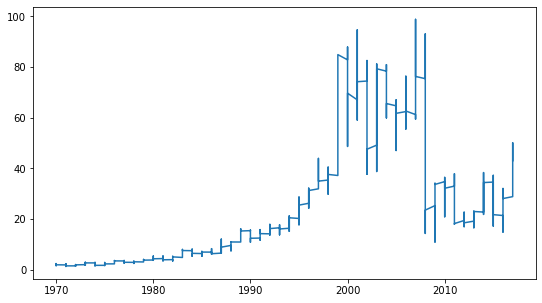

In [8]:
df.index=df['Year']
plt.figure(figsize=(9,5))
plt.plot(df['Close']);

From above we can see at initial stage closing price is very less and in year between 2000-2010 closing amount suddenly increase. 

## 5. coorelations  in all Features

<AxesSubplot:>

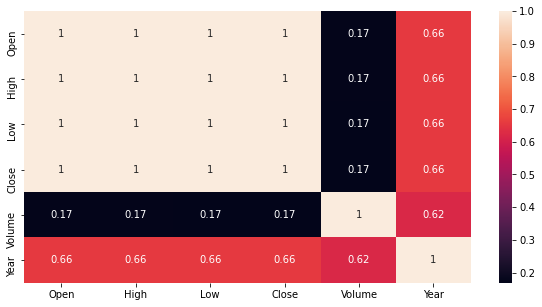

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

### From above Open,High,Low,Close features has same variations in given dataset 
### Ultimately Profit is calculated by loss, so lets consider as 'Close' as a Target Variable. 

'year' & 'Volume', features has less impact on Target variable ie.'Close'    

## 6. Final Dataset for prediction from above analysis is

In [10]:
df =df[['Open', 'High','Low','Close'] ]
df

,Open,High,Low,Close
Year,,,,
1970,2.2972,2.3178,2.2972,2.2972
1970,2.2972,2.2972,2.2544,2.2759
1970,2.2759,2.2759,2.2342,2.2342
1970,2.2342,2.2342,2.2342,2.2342
1970,2.2342,2.2342,2.2139,2.2139
...,...,...,...,...
2017,47.2000,47.6800,46.5300,47.2900
2017,47.1100,47.2042,46.5400,46.9700
2017,46.7300,46.7700,45.3700,45.8900


# B) Modelling - Linear Regression 

## 1. Split Dataset 

In [11]:
# Independent & dependent variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y.head()

Year
1970    2.2972
1970    2.2759
1970    2.2342
1970    2.2342
1970    2.2139
Name: Close, dtype: float64

In [12]:
# split Train & test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## 2. Training Model 

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## 3. Predictions

Accuracy:  0.9998574664919188


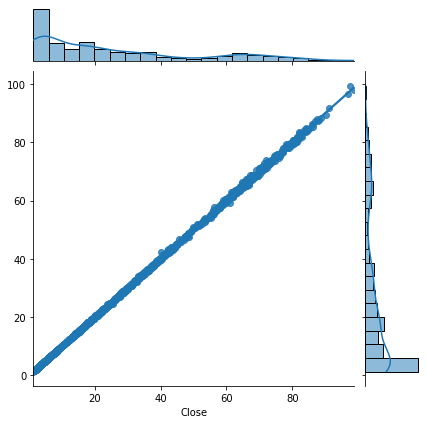

In [14]:
y_pred1 = regressor.predict(X_test)
ac = r2_score(y_test, y_pred1)
print('Accuracy: ',ac)

sns.jointplot(y_test, y_pred1, kind='reg');

### from above Visuliasations we can see actual values represneted by scatter and predictions ie linear line are very close to each other 

In [30]:
# Loss Functions
Mse = metrics.mean_squared_error(y_test,y_pred1)
Msle = metrics.mean_squared_log_error(y_test, y_pred1)
Mase = metrics.mean_absolute_error(y_test,y_pred1)

print('Mean Absolute error: ', round(Mase,2) )
print('Mean squared error: ', round(Mse,2) )
print('Mean squared log error: ', round(Msle,2))

Mean Absolute error:  0.16
Mean squared error:  0.08
Mean squared log error:  0.0


# c) Random_Forest_regressor 

In [65]:
rf_regressor = RandomForestRegressor(n_estimators = 10,criterion ='mse', random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## 1. Predictions 

In [66]:
y_pred2 = rf_regressor.predict(X_test)
ac = r2_score(y_test,y_pred2)
print('Accuracy: ',ac)

Accuracy:  0.9997805548478433


In [67]:
cv = cross_val_score(rf_regressor, X,y, cv=10 ).mean()
print('Cross_validation_score', cv)

Cross_validation_score 0.9806057998383148


### Difference between accuracy& Cv score is not much hence Model is Stable

## 2. Visualisation 

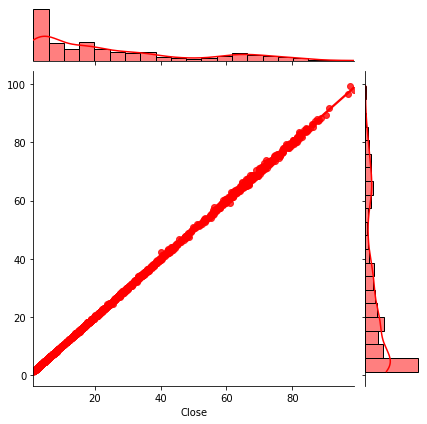

In [128]:
sns.jointplot(y_test,y_pred1, color='red', kind='reg');

# D) Hypertuning RandomForest regressor 

## 1.  RandomizedSearchCV

In [76]:
# All this procedure will decide best parameter just give each parameter limits/values range 
rf_pdist = {   'max_depth':[3,5,10,None],
               'n_estimators': [10,100,200,300,400,500],
               'max_features': randint(1,3),
               'min_samples_split': [2,5,10],
               'min_samples_leaf': randint(1,4),
               'bootstrap': [True,False]}
print(rf_pdist)

{'max_depth': [3, 5, 10, None], 'n_estimators': [10, 100, 200, 300, 400, 500], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022643F786C8>, 'min_samples_split': [2, 5, 10], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022643D30648>, 'bootstrap': [True, False]}


In [83]:
# create model by passing above parameter list
est=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=est, param_distributions=rf_pdist,n_iter=40, cv=9, n_jobs=-1)

## 2. Fit the Data To get best Parameters & Score

In [124]:
rf_random.fit(X,y)
print('Best parameters: ',rf_random.best_params_)
print('\nBest score : ',rf_random.best_score_)

Best parameters:  {'bootstrap': False, 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best score :  0.9521750323229864


## 3. Build Final Model with above Parameters   

In [122]:
rfp_regressor = RandomForestRegressor(n_estimators=300, max_depth=None, max_features=2, min_samples_leaf=2,min_samples_split=5, bootstrap=True)

In [123]:
rfp_regressor.fit(X,y)

RandomForestRegressor(max_features=2, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300)

## 4. Predicting & accuracy  

In [127]:
y_pred3 = rfp_regressor.predict(X_test)
ac = r2_score(y_test, y_pred3)
print('Accuracy: ',ac)

cv = cross_val_score(rfp_regressor, X,y, cv=10 ).mean()
print('Cross_validation_score', cv)

Accuracy:  0.9999386602940429
Cross_validation_score 0.9819004389982616


## E) DeepLearning Model:  LSTM 

In [138]:
# Tensorflow Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, BatchNormalization

In [161]:
# converting into array for further use
X_train= np.array(X_train)
y_train= np.array(y_train)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1) # reshape(Row, coln, input_dim)

X_test= np.array(X_test)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

## 1. Building LSTM Model 

In [182]:
model = Sequential()
#1st Layer
model.add(LSTM(units=60, input_shape = (X_train.shape[1],1), return_sequences = True, dropout=0.2))
model.add(BatchNormalization())

#2nd Layer
model.add(LSTM(units=60, dropout=0.2))
model.add(BatchNormalization())

#o/p Layer
model.add(Dense(units=1))

#compiling model
model.compile(optimizer='adam',loss='mean_squared_error', metrics='accuracy')

## 2. Training the Model 

In [183]:
model.fit(X_train,y_train, batch_size=32, epochs=20)

Epoch 1/20
302/302 [==============================] - 7s 7ms/step - loss: 696.1365 - accuracy: 0.0000e+00
Epoch 2/20
302/302 [==============================] - 2s 7ms/step - loss: 204.7291 - accuracy: 0.0000e+00
Epoch 3/20
302/302 [==============================] - 2s 8ms/step - loss: 38.3379 - accuracy: 0.0000e+00
Epoch 4/20
302/302 [==============================] - 2s 7ms/step - loss: 22.1664 - accuracy: 0.0000e+00
Epoch 5/20
302/302 [==============================] - 2s 7ms/step - loss: 24.2013 - accuracy: 0.0000e+00
Epoch 6/20
302/302 [==============================] - 2s 7ms/step - loss: 24.7796 - accuracy: 0.0000e+00
Epoch 7/20
302/302 [==============================] - 2s 7ms/step - loss: 23.1512 - accuracy: 0.0000e+00
Epoch 8/20
302/302 [==============================] - 2s 8ms/step - loss: 27.3169 - accuracy: 0.0000e+00
Epoch 9/20
302/302 [==============================] - 2s 7ms/step - loss: 28.2696 - accuracy: 0.0000e+00
Epoch 10/20
302/302 [==============================] 

## 3. visualising Prediction & actual values 

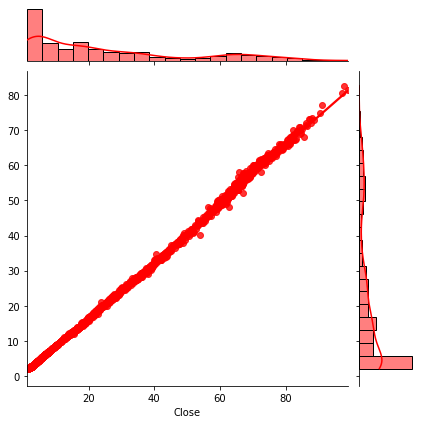

In [178]:
y_pred3 = model.predict(X_test)
y_pred3= y_pred3.flatten()
y_pred3.ndim
sns.jointplot(y_test,y_pred3, color='red', kind='reg');

# Conclusion

### From above we applied following ML, DL algorithms we get 100% accuracy for all models as dataset contains less features we dont have much outlier in it. for Future more specific predictions we need large feature dataset  

####  1. Linear Regression : Accuracy_Score :- 99.85%
#### 2. Random_Forest Regression : Accuracy_Score :- 99.97%,  Cross_val_score:-  98.06%
####      Which represents Best model which is stable for any data points.                                          

   Huypertune :Cross_val_score:-  98.19% which shows slightly increases cv_score after hypertuning
#### LSTM : It has minimal loss fn:-  24.186